<a href="https://colab.research.google.com/github/Vsanku01/Deep-Learning-Tuts/blob/master/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vishnudarshan","key":"1d8ec5f91eb354a34e5f83e7a2d63912"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
from zipfile import ZipFile
file_name = "cell-images-for-detecting-malaria.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**Split the datset**

In [0]:

import os

# initialize the path to the original input directory of images
orig_input_dataset = "/content/cell_images"

# initialize the base path to the new directory that will contain
# our images after computing the training and testing split
base_path = "content"

# derive the training, validation, and testing directories
train_path = os.path.sep.join([base_path, "training"])
val_path = os.path.sep.join([base_path, "validation"])
test_path = os.path.sep.join([base_path, "testing"])
 
# define the amount of data that will be used for training
train_split = 0.8
 
# the amount of validation data will be a percentage of the
# training data
val_split = 0.1


**Building the dataset**

In [0]:
from imutils import paths # which you need to download! 
import random
import shutil
import os

# shuffle all the images in the original input directory 
imagePaths = list(paths.list_images(orig_input_dataset))
random.seed(42)
random.shuffle(imagePaths)

In [0]:
# split the data into testing and training 
i = int(len(imagePaths) * train_split)
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

# set aside some of the training data for validation data 
i = int(len(trainPaths) * val_split)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

# define the training/validation/testing datasets 
datasets = [
	("training", trainPaths, train_path),
	("validation", valPaths, val_path),
	("testing", testPaths, test_path)
    ]

In [11]:
for (dType, imagePaths, baseOutput) in datasets:
	# show which data split we are creating
	print("[INFO] building '{}' split".format(dType))
 
	# if the output base output directory does not exist, create it
	if not os.path.exists(baseOutput):
		print("[INFO] 'creating {}' directory".format(baseOutput))
		os.makedirs(baseOutput)
 
	# loop over the input image paths
	for inputPath in imagePaths:
		# extract the filename of the input image and its class label
		filename = inputPath.split(os.path.sep)[-1]
		label = inputPath.split(os.path.sep)[-2]
 
		# build the path to the label directory
		labelPath = os.path.sep.join([baseOutput, label])
 
		# if the label output directory does not exist, create it
		if not os.path.exists(labelPath):
			print("[INFO] 'creating {}' directory".format(labelPath))
			os.makedirs(labelPath)
 
		# construct the path to the destination image and then copy
		# the image itself
		p = os.path.sep.join([labelPath, filename])
		shutil.copy2(inputPath, p)

[INFO] building 'training' split
[INFO] building 'validation' split
[INFO] building 'testing' split


In [0]:
data_dir = '/content/content'

In [13]:
os.listdir(data_dir)

['testing', 'validation', 'training']

**Data Wrangling**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [15]:
train_path

'content/training'

In [16]:
test_path

'content/testing'

In [17]:
val_path

'content/validation'

In [18]:
os.listdir(train_path)

['Uninfected', 'Parasitized']

In [19]:
# Grab a single Parasitized image
os.listdir(train_path+'/Parasitized')[0]

'C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [20]:
para_cell = train_path + '/Parasitized' + '/C68P29N_ThinF_IMG_20150819_134830_cell_43.png'
para_cell

'content/training/Parasitized/C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [21]:
#imread automatically normalises the pixel values.
#imread(para_cell)
imread(para_cell).shape

(154, 130, 3)

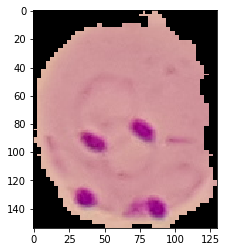

In [22]:
plt.imshow(imread(para_cell))

In [23]:
os.listdir(train_path + '/Uninfected')[0]

'C164P125ThinF_IMG_20151116_120135_cell_129.png'

In [24]:
uninfected_cell = train_path + '/Uninfected' + '/C164P125ThinF_IMG_20151116_120135_cell_129.png'
uninfected_cell

# We have different images dimensions
imread(uninfected_cell).shape

(112, 103, 3)

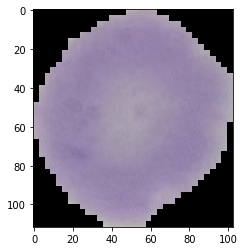

In [25]:
plt.imshow(imread(uninfected_cell))

In [0]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/Uninfected'):
  img = imread(test_path+'/Uninfected'+'/'+image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)


In [0]:
#dim1

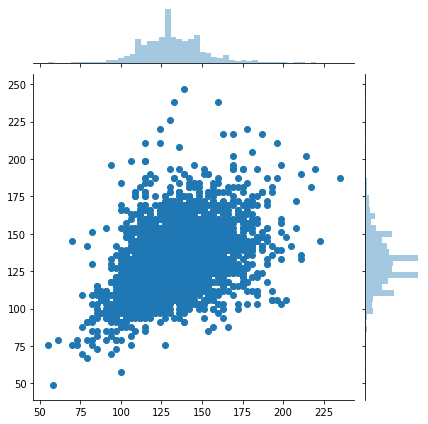

In [27]:
sns.jointplot(dim1,dim2) # Shows the various dimensions of the images

In [28]:
#Calculate the mean dimensions of all the images
np.mean(dim1)

131.70933062880326

In [29]:
np.mean(dim2)

131.74401622718054

In [0]:
image_shape = (130,130,3)

**Image Data Generator**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#help(ImageDataGenerator)

In [32]:
imread(uninfected_cell).min() # Images are already normalised

0.0

In [0]:
image_gen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
    
)

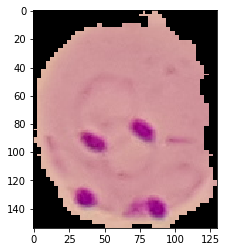

In [36]:
para_img = imread(para_cell)
plt.imshow(imread(para_cell))

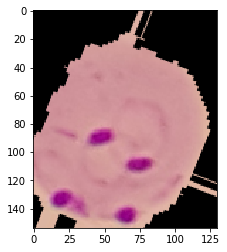

In [92]:
plt.imshow(image_gen.random_transform(para_img))

In [38]:
train_path

'content/training'

In [39]:
image_gen.flow_from_directory(train_path)

Found 25386 images belonging to 2 classes.


In [40]:

image_gen.flow_from_directory(test_path)

Found 9920 images belonging to 2 classes.


In [42]:
image_gen.flow_from_directory(val_path)

Found 4211 images belonging to 2 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

#Conv Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = image_shape ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Second Conv Layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Third Conv Layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))

#Droput reduces overfitting
model.add(Dropout(0.5))

#Final Layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience = 2)

batch_size = 40







In [49]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary'
                                                )

Found 25386 images belonging to 2 classes.


In [50]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary',
                                               shuffle = False
                                                )

Found 9920 images belonging to 2 classes.


In [46]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [51]:
results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 635 steps, validate for 248 steps
Epoch 1/20
635/635 [==============================] - 183s 288ms/step - loss: 0.8198 - accuracy: 0.8325 - val_loss: 0.2241 - val_accuracy: 0.9280
Epoch 2/20
635/635 [==============================] - 182s 286ms/step - loss: 0.2237 - accuracy: 0.9281 - val_loss: 0.1937 - val_accuracy: 0.9358
Epoch 3/20
635/635 [==============================] - 182s 287ms/step - loss: 0.2101 - accuracy: 0.9318 - val_loss: 0.1912 - val_accuracy: 0.9413
Epoch 4/20
635/635 [==============================] - 182s 286ms/step - loss: 0.1958 - accuracy: 0.9391 - val_loss: 0.1883 - val_accuracy: 0.9444
Epoch 5/20
635/635 [==============================] - 182s 286ms/step - loss: 0.1889 - accuracy: 0.9391 - val_loss: 0.1799 - val_accuracy: 0.9309
Epoch 6/20
635/635 [==============================] - 181s 285ms/step - loss: 0.1855 - accuracy: 0.9420 - val_loss: 0.1597 - val_accuracy: 0.9505
Epoch 7/20
635/635 [==========

**Model Evaluation**

In [0]:
  result = pd.DataFrame(model.history.history)

In [62]:
result

,loss,accuracy,val_loss,val_accuracy
0,0.820048,0.832467,0.224122,0.928024
1,0.223754,0.928110,0.193677,0.935786
2,0.210045,0.931773,0.191169,0.941331
3,0.195776,0.939100,0.188258,0.944355
4,0.188909,0.939140,0.179857,0.930948
5,0.185474,0.941976,0.159663,0.950504
6,0.177949,0.945994,0.157332,0.951210
7,0.171127,0.947412,0.146855,0.953125
8,0.165889,0.946821,0.157893,0.947077
9,0.165665,0.946742,0.147410,0.952117


In [57]:
result.columns


Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

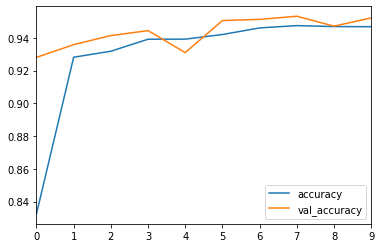

In [59]:
result[['accuracy','val_accuracy']].plot()

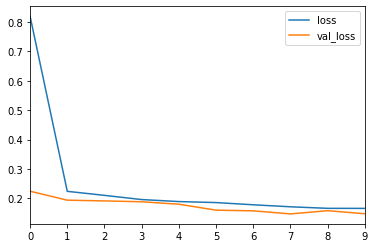

In [60]:
result[['loss','val_loss']].plot()

In [61]:
model.metrics_names

['loss', 'accuracy']

In [0]:
from sklearn.metrics import classification_report , confusion_matrix

In [64]:
pred = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [65]:
pred

array([[1.3865207e-03],
       [4.3505024e-06],
       [5.0877920e-06],
       ...,
       [9.7350717e-01],
       [9.3931699e-01],
       [9.6045011e-01]], dtype=float32)

In [0]:
predictions = pred > 0.5 

In [110]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [95]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4990
           1       0.94      0.97      0.96      4930

    accuracy                           0.95      9920
   macro avg       0.96      0.95      0.95      9920
weighted avg       0.96      0.95      0.95      9920



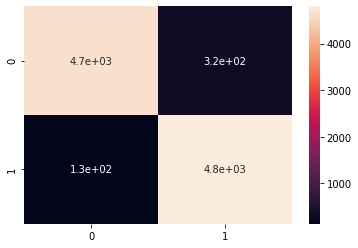

In [96]:
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot=True)

In [97]:
para_cell

'content/training/Parasitized/C68P29N_ThinF_IMG_20150819_134830_cell_43.png'

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
my_image = image.load_img(para_cell,target_size= image_shape)

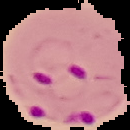

In [103]:
my_image

In [0]:
 my_image_arr = image.img_to_array(my_image)

In [105]:
my_image_arr.shape

(130, 130, 3)

In [0]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)

In [107]:
my_image_arr.shape

(1, 130, 130, 3)

In [114]:
model.predict(my_image_arr) > 0.5

array([[False]])